Q-1 
* Implement a KNN model to classify the animals in to categorie


In [44]:
# IMPORT LIBRARIES 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# UPLOAD DATA
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [48]:
#  DATA SIZE 

df.shape

(101, 18)

In [65]:
# DROP 'ANIMAL NAME' THAT IS NOT USEFUL FOR BUILD MODEL

df1=df.drop(['animal name'], axis=1)
df1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


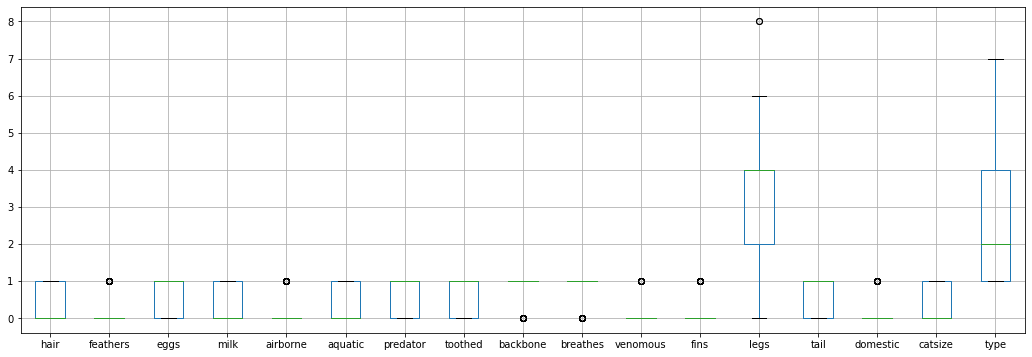

In [66]:
# DATA VISUALIZATION 

plt.figure(figsize=(18,6))
df1.boxplot()
plt.show()

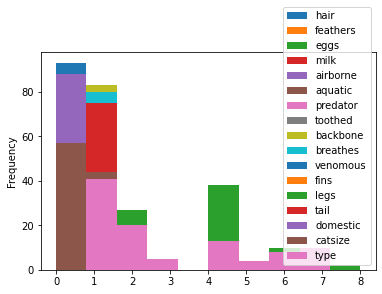

In [67]:
df1.plot(kind='hist')
plt.show()

In [68]:
# INDEPENDENT VARIABLE
x = df1.iloc[:, :16]
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [69]:
# DEPENDENT VARIABLE (TARGET COLUMN)
y=df1.iloc[:,-1]
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [70]:
#  CALCULATE NUMBER OF TYPE ANIMALS 
y.value_counts()   # there are 5 types animales  

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [97]:
# BUILD  MODEL
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [98]:
# DIVIDED THE AND CHECK ACCURACY 
kfold = KFold(n_splits = 10)
results = cross_val_score(model, x, y, cv = kfold)

In [99]:
# INDIVIDUAL ACCURACY FOR EVERY FOLD 
results

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 0.9])

In [100]:
# ACCURACY OVERALL 
results.mean()   

0.9800000000000001

#  Grid Search for Algorithm Tuning 

In [75]:
n_neighbors = list(range(1,25)) # [1,2,4,...,25]
parameters = {'n_neighbors' : n_neighbors}  

model = KNeighborsClassifier()

grid = GridSearchCV(estimator = model, param_grid = parameters) #GridSearchCV use all combination of parameters  give best  
grid.fit(x, y)                                                  # combination of parameteter
                                                                # By best combination of parameter we take best accuracy by 
                                                      #model.We can GridSearchCV for any algorithm

c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]})

In [76]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


* Here we can understand that k=1 best option for this data 

In [102]:
# use iteration to caclulator different k in models

k_range = range(1, 25)
k_scores = []

# then return the average accuracy based on the cross validation

for k in k_range:                                     # same work we did by GridSearchCv algorithm that is easy 
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
k_scores

c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\users\babar ali\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\

[0.97,
 0.9199999999999999,
 0.93,
 0.9004761904761904,
 0.8509523809523811,
 0.8509523809523811,
 0.8414285714285714,
 0.8014285714285714,
 0.7919047619047619,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.7419047619047618,
 0.7228571428571429,
 0.7128571428571429,
 0.7028571428571427]

# model result visualization

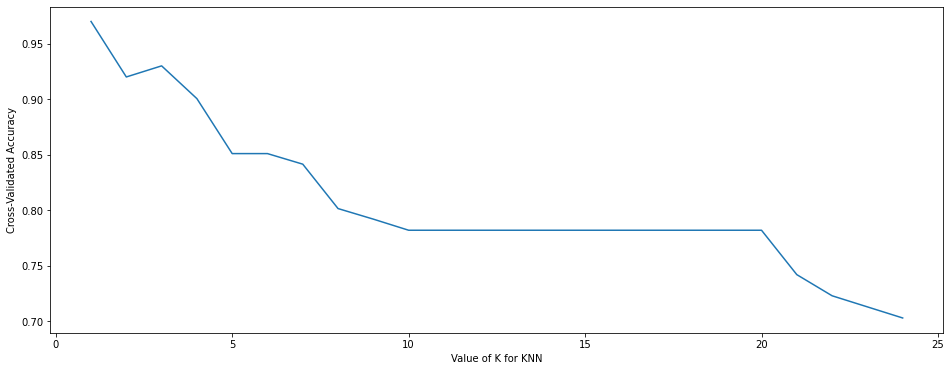

In [103]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
#plt.ylim(0.73,0.76)
plt.show()

******************

Q-2
Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

* Type: Type of glass: (class attribute)
*  1 -- building_windows_float_processed
*  2 --building_windows_non_float_processed
*  3 --vehicle_windows_float_processed
*  4 --vehicle_windows_non_float_processed (none in this database)
*  5 --containers
*  6 --tableware
*  7 --headlamps







In [143]:
#  UPLOAD DATA 
df2=pd.read_csv('glass.csv')
df2

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


<AxesSubplot:>

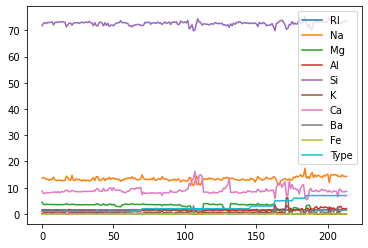

In [144]:
# DATA VISUALIZATION
df2.plot()


<AxesSubplot:>

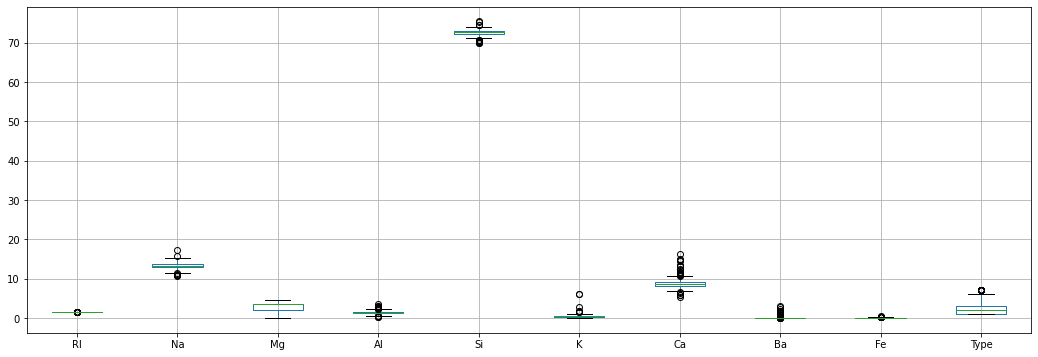

In [146]:
plt.figure(figsize=(18,6))
df2.boxplot()

<AxesSubplot:ylabel='Frequency'>

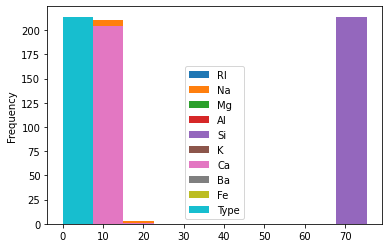

In [147]:
df2.plot(kind='hist')

In [148]:
# DATA SIZE
df2.shape

(214, 10)

In [149]:
# INDEPENDENT COLUMNS VALUES
x1=df2.iloc[:,:9]
x1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [150]:
# DEPENDENT VALUE COLUMN(TARGET COLUMN)
y1=df2.iloc[:,-1]
y1

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [161]:
# BUILD  MODEL
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(x1,y1)

KNeighborsClassifier(n_neighbors=1)

In [164]:
# DIVIDED THE AND CHECK ACCURACY 
kfold1 = KFold(n_splits = 10)
results1 = cross_val_score(model1, x1, y1, cv = kfold1)
results1

array([0.5       , 0.59090909, 0.5       , 0.81818182, 0.38095238,
       0.66666667, 0.42857143, 0.47619048, 0.28571429, 0.95238095])

In [165]:
# OVERALL ACCURACY 
results1.mean()

0.5599567099567099

In [166]:
n_neighbors1 = list(range(1,25)) # [1,2,4,...,25]
parameters1 = {'n_neighbors' : n_neighbors}  

model1 = KNeighborsClassifier()

grid1 = GridSearchCV(estimator = model1, param_grid = parameters1) #GridSearchCV use all combination of parameters  give best  
grid1.fit(x1, y1)                                                  # combination of parameteter
                                                                # By best combination of parameter we take best accuracy by 
                                                      #model.We can GridSearchCV for any algorithm

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]})

In [167]:
# BEST K VALUE FOR PREDECTION RESULT
print(grid1.best_score_)
print(grid1.best_params_)

0.640531561461794
{'n_neighbors': 1}


### Visualizing the CV results


In [168]:
# use iteration to caclulator different k in models

k_range1 = range(1, 25)
k_scores1 = []

# then return the average accuracy based on the cross validation

for k in k_range:                                     # same work we did by GridSearchCv algorithm that is easy 
    knn1 = KNeighborsClassifier(n_neighbors = k)
    scores1 = cross_val_score(knn1, x1, y1, cv=5)
    k_scores1.append(scores1.mean())
k_scores1    

[0.640531561461794,
 0.6311184939091916,
 0.598781838316722,
 0.6033222591362126,
 0.612624584717608,
 0.6174972314507199,
 0.6032115171650055,
 0.5985603543743079,
 0.5892580287929124,
 0.5937984496124031,
 0.5891472868217054,
 0.5985603543743079,
 0.6032115171650055,
 0.6171650055370985,
 0.6032115171650055,
 0.6078626799557032,
 0.626467331118494,
 0.626467331118494,
 0.6218161683277963,
 0.6171650055370985,
 0.6031007751937983,
 0.6031007751937983,
 0.5890365448504984,
 0.5890365448504984]

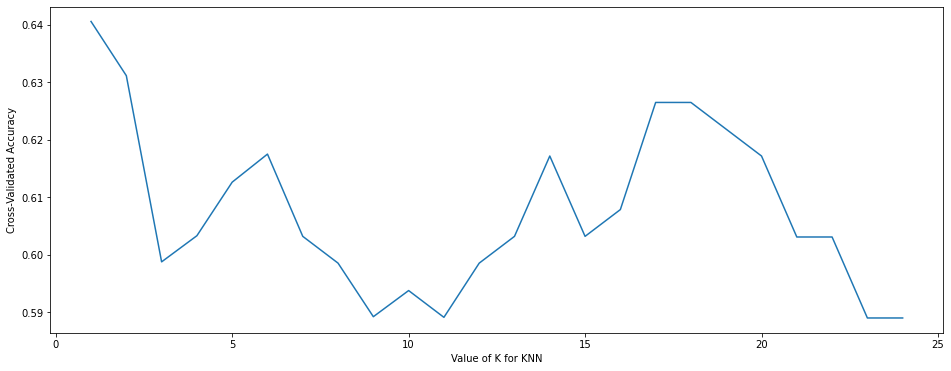

In [169]:
plt.figure(figsize=(16,6))
plt.plot(k_range1, k_scores1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
#plt.ylim(0.73,0.76)
plt.show()